In [18]:
import numpy as np

alpha = 5
beta = 1
gamma = 5
delta = 1

import matplotlib.pyplot as plt 

import scipy.integrate

$\underline{\textbf{Question 1}} : $

On considère le système suivant (modèle proie/prédateur) :
$$
\left\{\begin{matrix}
\dot{x_1} = x_1(\alpha - \beta x_2)
\\ \dot{x_2} = -x_2(\gamma - \delta x_1)
\end{matrix}\right.
$$

Que l'on réécrit :
$$
\dot{x} = f(x) = \begin{pmatrix}x_1(\alpha - \beta x_2)\\ -x_2(\gamma - \delta x_1)\end{pmatrix} = \begin{pmatrix}f_1(x)\\f_2(x) \end{pmatrix}
$$

On peut interpréter les différents termes de l'équation :
- $\alpha$ est le taux de reproduction des proies
- $\beta$ quantifie le taux de mortalité des proies dû aux prédateurs
- $\gamma$ est le taux de mortalité des prédateurs
- $\delta$ est le taux de reproduction des prédateurs en fonction des proies mangées

Quant aux points d'équilibre :
On vérifie immédiatement que $\begin{pmatrix}0\\0 \end{pmatrix}$ est point d'équilibre. Puis $f(x) = 0$ avec $x \neq 0$ implique immédiatement que $\bar{x} = \begin{pmatrix}\frac{\gamma}{\delta}\\ \frac{\alpha}{\beta}\end{pmatrix}$. Alors on vérifie bien directement que $\bar{x}$ est point d'équilibre et $\bar{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Nous allons étudier le linéarisé tangent pour voir si on peut conclure quelque chose sur la stabilité des points d'équilibre. On a :
$J_f(x) = \begin{pmatrix}\alpha - \beta x_2 & -\beta x_1\\ \delta x_2 & \gamma - \delta x_1\end{pmatrix}$, donc $J_f(0) = \begin{pmatrix}\alpha & 0 \\ 0 & \gamma \end{pmatrix}$ et $J_f(\bar{x}) = \begin{pmatrix}0 & -\beta \frac{\gamma}{\delta} \\ \delta \frac{\alpha}{\beta} & 0 \end{pmatrix}$.

Il est alors clair que le point $0$ n'est pas stable car les valeurs propres de $J_f(0)$ sont strictement positives ! Quant au point $\bar{x}$, les valeurs propres de $J_f(\bar{x})$ sont imaginaires pures car son polynôme caractéristique est $X^2 + \alpha \gamma$. On ne peut donc <ins>rien conclure</ins> sur la stabilité du point $\bar{x}$ (la partie réelle des valeurs propres est nulle, il faudrait qu'elle soit strictement positive ou strictement négative si on voulait conclure quelque chose).

$\underline{\textbf{Question 2}} : $

On utilise la fonction meshgrid du module Numpy pour créer une grille de points ($x_1$, $x_2$), et pour chacun de ces points nous calculons ($\dot{x_1}$, $\dot{x_2}$). Nous utilisons ensuite la fonction quiver du module matplotlib pour afficher chaque vecteur vitesse et ainsi créer le champ de vecteurs.

La deuxième figure correspond au portrait de phase

Text(0, 0.5, 'x2')

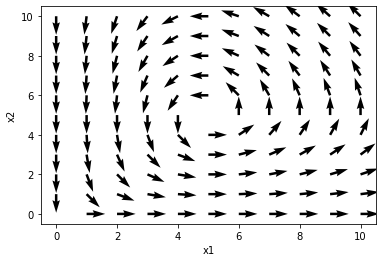

In [27]:
taille_grille = 10
A=[i for i in range (taille_grille + 1)]
GRID = np.meshgrid(A,A)

def v(x1, x2):
    return [x1*(alpha - beta*x2), -x2*(gamma - delta*x1)]

plt.figure()
for i in range (taille_grille + 1):
    for j in range (taille_grille + 1):
        v1, v2 = v(GRID[0][i][j], GRID[1][i][j])
        plt.quiver(GRID[0][i][j], GRID[1][i][j], v1, v2 )

plt.xlabel('x1')
plt.ylabel('x2')


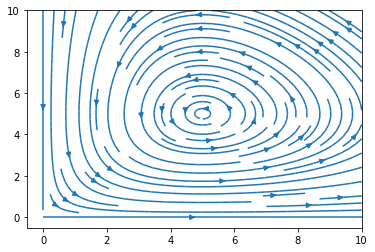

In [25]:
plt.streamplot(GRID[0], GRID[1], v(GRID[0], GRID[1])[0], v(GRID[0], GRID[1])[1]);

Il semble que les solutions tournent autour du point d'équilibre non nul

$\underline{\textbf{Question 3}} : $

Il est clair déjà que $f$ est de classe $C^1$, car sa jacobienne est continue (voir Q1 pour son expression).  Donc le théorème de Cauchy-Lipschitz assure l'existence et l'unicité d'une solution maximale au système $\left\{\begin{matrix}\dot{x} = f(x)\\ x(t_0) = x_0\end{matrix}\right.$ avec $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Supposons par l'absurde qu'il existe $t_1$ tel que $x_1(t_1) = 0$ par exemple (le cas $x_2(t_1) = 0$ est exactement similaire, il suffit de refaire le raisonnement ci-dessous).
Alors $x$ est solution du problème de Cauchy : $\left\{\begin{matrix}\dot{x} = f(x)\\ x(t_1) = \begin{pmatrix}
0\\ 
x_2(t_1)
\end{pmatrix}\end{matrix}\right.$

Mais on constate également que $\begin{pmatrix}
0\\ 
x_2(t_1)e^{-\gamma (t-t_1)}
\end{pmatrix}$ est solution également ! (Cela se vérifie aisément avec $f$).

Or par unicité de la solution maximale, il vient que $x(t) = \begin{pmatrix}
0\\ 
x_2(t_1)e^{-\gamma (t-t_1)}
\end{pmatrix}$, ce qui contredit le fait que $x(t_0)$ n'a aucune composante négative ou nulle ! On aboutit donc à une contradiction, donc $x_1$ ne peut s'annuler, et comme $x$ est une fonction continue, il vient que $x_1$ est nécessairement toujours strictement positive.

Donc si $x$ est initialisé dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, il y restera sur tout son intervalle de définition.

$\underline{\textbf{Question 4}} : $

On considère la fonction : $H(x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$. Qui est bien définie si on initialise à $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ d'après ce qui précède.

Calculons la dérivée temporelle de $H$ :

$\frac{dH}{dt} = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} = 0$ Après développement !

Donc $H$ est constante, ce qui assure que $x_1$ et $x_2$ sont bornées, donc elles n'explosent pas en temps fini, donc nécessairement la solution maximale est définie sur $\mathbb{R}$ tout entier !